#  Self-Study 5: Coupled Dynamics and Stability

In this self-study, we will explore the concepts of stability and coupled dynamics. A key part of our approach will involve using symbolic mathematics.

If you are not familiar with `sympy`, take a look at the notebook `sympy_basics.ipynb` for a quick introduction.
This notebook also contains examples on how to use `sympy` to compute the Jacobian matrix of a system of differential equations.

## Section 1: Fixed Points and Phase Portrait

In this section we will be looking at the dynamics of a system of ODEs with **two coupled** variables, $x$ and $y$.

$$
\frac{dx}{dt} = \alpha x - \beta x^2 - \gamma xy
$$
$$
\frac{dy}{dt} = \delta y - y^2 - xy
$$


### Task 1: Find the fixed points analytically (with `sympy`)


The fixed points are the points where the derivatives are zero.
In other words, if the system starts at such a point, it will remain fixed there unless perturbed.

In [2]:
from sympy import symbols, Eq, solve, Subs

# Declare variables, hint: use symbols()
x, y = symbols('x, y')# your code here
dxdt, dydt = symbols('dxdt, dydt')
alpha, beta, gamma, delta = symbols('a b g d')# your code here

# Define the equations for dx/dt and dy/dt

# Set up equations for fixed points
eq1 = Eq((alpha * x - beta * x**2 - gamma * x * y), 0) # your code here
eq2 = Eq((delta * y - y**2 - x*y), 0)# your code here

# Solve for fixed points
fixed_points = solve([eq1, eq2], [x,y])# your code here
print(fixed_points)

[(0, 0), (0, d), (a/b, 0), ((a - d*g)/(b - g), (-a + b*d)/(b - g))]


### Task 2: Plot the phase portrait

The phase portrait is a plot of the trajectories of the system in the $x-y$ plane. It is useful to visualise the dynamics of the system.


[(0, 0), (0, 2), (3, 0), (1, 1)]


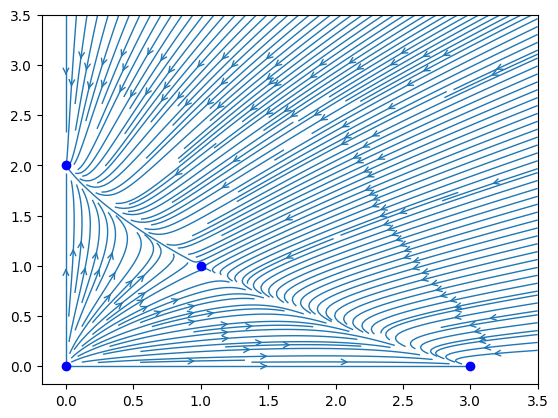

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find numerical fixed points for the symbolic solutions you found earlier.
# You can start with these values (Slide 11), but feel free to change them to see what happens.

alpha_val = 3
beta_val = 1
gamma_val = 2
delta_val = 2

fixed_points_val = []
for x, y in fixed_points:
    # **Hint:** Look at the sympy documentation for the `subs` method
    # your code here
    value = (x.subs([(alpha, alpha_val), (beta, beta_val), (gamma, gamma_val), (delta, delta_val)]),
             y.subs([(alpha, alpha_val), (beta, beta_val), (gamma, gamma_val), (delta, delta_val)]))
    fixed_points_val.append(value)
    pass
print(fixed_points_val)

# Step 2: Generate streamplot of the vector field defined by the equations above.
# **Hint:** Look at the matplotlib documentation for the `streamplot` function.
X, Y = np.meshgrid(np.linspace(0, 3.5, 40), np.linspace(0, 3.5, 40))

# compute the vector field at the meshgrid points
U = alpha_val * X - beta_val * X**2 - gamma_val * X * Y # your code here
V = delta_val * Y - Y**2 - X * Y # your code here

# use plt.streamplot to plot
plt.streamplot(X, Y, U, V, linewidth=1, arrowsize=1, arrowstyle='->', density=3, minlength=0.2)
x_vals = [fixed_points_val[i][0] for i in range(len(fixed_points_val))]
y_vals = [fixed_points_val[i][1] for i in range(len(fixed_points_val))]
plt.plot(x_vals, y_vals, 'bo')
plt.show()

# Step 3: Overlay fixed points onto the streamplot


## Section 2: Stability of Fixed Points

Using the same system as above, investigate the stability of the fixed points.

1. Find the fixed points of the system (i.e., Task 1 above).
1. Define the Jacobian matrix of the system.
2. Find its eigenvalues at each fixed point.
3. Determine the stability (see Lecture 5, Slide 8).

The Jacobian matrix is given by:

$$
J = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix}
$$


In [4]:
# 1. Find Fixed Points (Same system as above)
x, y = symbols('x y')

# this time we will use explicit values for the parameters
alpha, beta, gamma, delta = 3, 1, 2, 2

f = alpha * x - beta * x**2 - gamma * x * y# your code here
g = delta * y - y**2 - x*y  # your code here

fixed_points = solve([Eq(f,0), Eq(g,0)], [x,y]) # your code here

In [5]:
# 2. Create the Jacobian Matrix
# Hint: use Matrix and diff from sympy to compute the Jacobian matrix
from sympy import diff, Matrix


# Define the Jacobian matrix
J = Matrix([[diff(f,x), diff(f,y)], [diff(g,x), diff(g,y)]]) # your code here
J

Matrix([
[-2*x - 2*y + 3,         -2*x],
[            -y, -x - 2*y + 2]])

In [7]:
from sympy import Subs

# 3. Compute eigenvalues for each fixed point 
eigenvalues = list(J.eigenvals().keys())
eigenvalues_fixed_points = {}
for point in fixed_points:
    eigenvalues_fixed_points[str(point)] = [Subs(eigenvalues[0], (x,y), point).doit(), Subs(eigenvalues[1], (x,y), point).doit()]

print(eigenvalues)
eigenvalues_fixed_points

[-3*x/2 - 2*y - sqrt(x**2 + 8*x*y - 2*x + 1)/2 + 5/2, -3*x/2 - 2*y + sqrt(x**2 + 8*x*y - 2*x + 1)/2 + 5/2]


{'(0, 0)': [2, 3],
 '(0, 2)': [-2, -1],
 '(1, 1)': [-sqrt(2) - 1, -1 + sqrt(2)],
 '(3, 0)': [-3, -1]}

## Section 3: An Application
Let's explore an economic model inspired by the Lotka-Volterra equations:

1. **Resource (r)**: Represents a natural resource that grow at a constant rate $a$, e.g., grain.
2. **Producers (y)**: Companies consume the resource to produce output $y$, at an operational cost of $c$, e.g., labor costs.
3. **Production**: The resource is consumed at a rate $k$ proportional to both current production $y$ and available resources $r$.


The model is described by the following differential equations:
$$
\frac{dr}{dt} = a r - k y r
$$
$$
\frac{dy}{dt} = k y r -c y
$$


### Task 1: Find the fixed points and the eigenvalues of the Jacobian matrix

What do we learn from these eigenvalues?

In [6]:
from sympy import symbols, Eq, solve, Matrix

# 1. Declare variables as symbols
r, y = symbols('r, y')

# 2. Define parameters
a = 2
c = 8
k = 5

# 3. Define the differential equations
f = a*r - k*y*r
g = k*y*r - c*y

# 4. Find Fixed Points
fixed_points_3 = solve([Eq(f,0), Eq(g,0)], [r,y])
print("Fixed points:", fixed_points_3)
print()
# 5. Define the Jacobian matrix
J_3 = Matrix([[diff(f,r), diff(f,y)], [diff(g,r), diff(g,y)]])
print("Jacobian: ", J)
print()

# 6. Compute eigenvalues at each fixed point
eigenvalues_3 = list(J_3.eigenvals().keys())
eigenvalues_fixed_points_3 = {}
tau_values = {}
delta_values = {}
for point in fixed_points_3:
    tau = J_3.trace().subs([(r, point[0]), (y, point[1])])
    delta = J_3.det().subs([(r, point[0]), (y, point[1])])
    tau_values[str(point)] = tau 
    delta_values[str(point)] = delta
    eigenvalues_fixed_points_3[str(point)] = [Subs(eigenvalues_3[0], (r,y), point).doit(), Subs(eigenvalues_3[1], (r,y), point).doit()]

print("Eigenvalues:", eigenvalues_fixed_points_3)
print("Taus:", tau_values)
print("Deltas:", delta_values)


Fixed points: [(0, 0), (8/5, 2/5)]

Jacobian:  Matrix([[-2*x - 2*y + 3, -2*x], [-y, -x - 2*y + 2]])

Eigenvalues: {'(0, 0)': [-8, 2], '(8/5, 2/5)': [-4*I, 4*I]}
Taus: {'(0, 0)': -6, '(8/5, 2/5)': 0}
Deltas: {'(0, 0)': -16, '(8/5, 2/5)': 16}


## Interpretation

### Fixed point $(0,0)$
This fixed point seems to always have $\tau, \delta < 0$ and so it is a saddle point. The eigenvalues are real and have opposite sign

### Fixed point $(x_1, y_1)$
This fixed point seems to always have $\tau = 0$ and $\delta > 0$ which is a center point and the fact that the eigenvalues are complex with a zero real part confirms this fact

### Task 2: Plot the phase portrait

In [7]:
from scipy.integrate import odeint

In [8]:
def lv_system(x, t, a, k, c):
    # your code here
    dR_dt = a * x[0] - k * x[0] * x[1]
    dY_dt = k * x[0] * x[1] - c * x[1]
    return [dR_dt, dY_dt]

In [9]:
from ipywidgets import interact

# plot Phase Portrait
X, Y = np.meshgrid(np.linspace(0, 3.5, 40), np.linspace(0, 3.5, 40))
t=0

@interact(a=(0,20,1), k=(0,20,1), c=(0,20,1))
def plot_phase_portrait(a, k, c):
    U, V = lv_system([X, Y], t, a, k, c)
    plt.streamplot(X, Y, U, V, linewidth=1, arrowsize=1, density=3, arrowstyle='->', minlength=0.2)
    plt.show()

interactive(children=(IntSlider(value=10, description='a', max=20), IntSlider(value=10, description='k', max=2…

### Task 3: Adapt the model (Optional)

1. Given the base model, change it to include a new concept, e.g., consumers, multiple resources, etc.
2. Make a new phase portrait for the adapted model.
3. Describe how the changes affect the dynamics of the system.

$$
\frac{dr}{dt} = a r - k y
$$
$$
\frac{dy}{dt} = k y  -c y
$$

In [10]:
def lv_system_extended(x, t, a, k, c):
    # your code here
    dR_dt = a*x[0] - k * x[1]
    dY_dt = k * x[1] - c * x[1]
    return [dR_dt, dY_dt]

In [11]:
from ipywidgets import interact

# plot Phase Portrait
X, Y = np.meshgrid(np.linspace(0, 3.5, 40), np.linspace(0, 3.5, 40))
t=0

@interact(a=(0,20,1), k=(0,20,1), c=(0,20,1))
def plot_phase_portrait(a, k, c):
    U, V = lv_system_extended([X, Y], t, a, k, c)
    plt.streamplot(X, Y, U, V, linewidth=1, arrowsize=1, arrowstyle='->', minlength=0.2)
    plt.show()

interactive(children=(IntSlider(value=10, description='a', max=20), IntSlider(value=10, description='k', max=2…

## Adapted model intuition

In this model, the thought is that the producer does not consider the amount of resources left, to highlight what greed can do some of to our scarce natural resources.
It then looks like if the production rises above some threshold $y = K \cdot r$, then the resource $r$ is doomed to become depleted if the producer ignores the scarcity of the resource, which of course is unrealistic as the situation where there are no resources left isn't wanted since the producer will potentially die out as a result. This also assumes that the producer can obtain whatever amount of the resource that it needs, even though this becomes tougher and more expensive when the resource drains out.
